<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Smartphone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install kaggle

In [86]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [87]:
# Kaggle api
!kaggle datasets download abdulmalik1518/mobiles-dataset-2025

Dataset URL: https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025
License(s): apache-2.0
mobiles-dataset-2025.zip: Skipping, found more recently modified local copy (use --force to force download)


In [88]:
!ls

 kaggle.json  'Mobiles Dataset (2025).csv'   mobiles-dataset-2025.zip   sample_data


In [89]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/mobiles-dataset-2025.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#loading the csv file to pd dataset
data = pd.read_csv("/content/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')

In [92]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [93]:
data.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


In [94]:
data.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [96]:
model_count=data['Company Name'].value_counts()

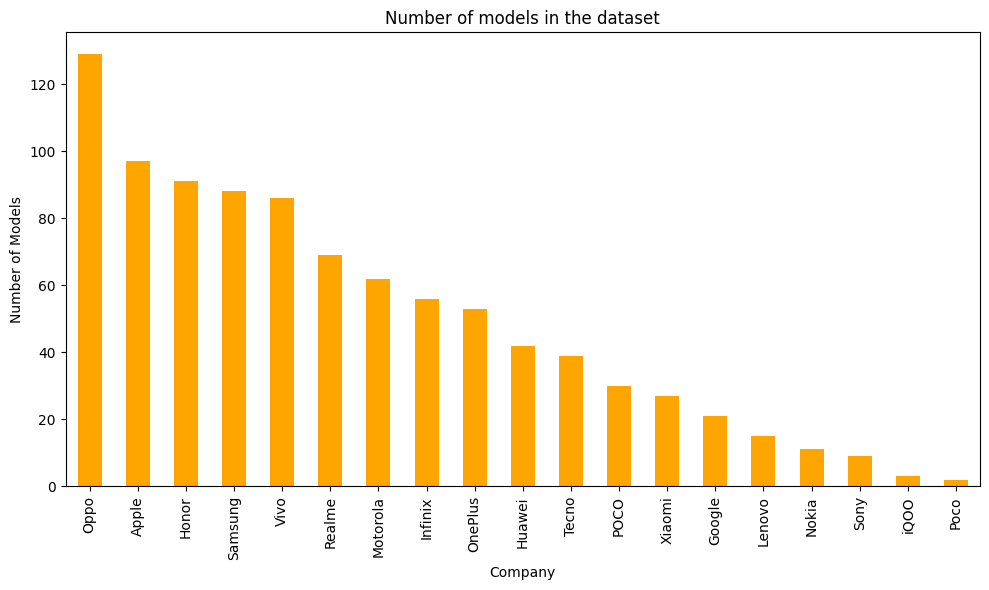

In [97]:
plt.figure(figsize=(10,6))
model_count.plot(kind="bar",color="orange")
plt.title("Number of models in the dataset")
plt.xlabel("Company")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.show()

In [98]:
data = data.drop(columns=['Launched Price (Pakistan)','Launched Price (China)','Launched Price (USA)','Launched Price (Dubai)'])

In [99]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999",2024


In [100]:
data.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 200,999",2024


In [101]:
data.shape

(930, 11)

In [102]:
# Removing the GB part from the RAM
def remove_gb(data):
  for index, row in data.iterrows():
    if '/' in row['RAM']:
      row_varients = row['RAM'].split('/')
      row_values = [int(x.replace('GB','')) for x in row_varients]
      average_values = sum(row_values)/len(row_values)
      data.at[index,'RAM'] = f'{average_values}GB'
  return data

data = remove_gb(data)



In [103]:
data['RAM'] = data['RAM'].str.replace('GB','').astype(float)

In [104]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6.0,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6.0,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999",2024


In [105]:
# Convert the 'Front Camera' column to strings
data['Front Camera'] = data['Front Camera'].astype(str)
data['Back Camera'] = data['Back Camera'].astype(str)

# Function to process and average the 'Camera' values
def process_camera(data, column_name):
    for index, row in data.iterrows():
        camera_value = row[column_name]

        # Remove '(UDC)' if present
        camera_value = camera_value.replace('(UDC)', '')

        # Handle multiple values separated by comma
        if ',' in camera_value:
            row_variants = camera_value.split(',')
        else:
            row_variants = [camera_value]

        # Process each value to remove 'MP', '4K', and strip whitespace
        row_values = []
        for val in row_variants:
            val = val.replace('MP', '').replace('4K', '').strip()
            if val.isdigit():
                row_values.append(int(val))

        # Calculate average if multiple values, otherwise take the single value
        if row_values:
            average_value = sum(row_values) / len(row_values)
            data.at[index, column_name] = f'{average_value}MP'
        else:
            data.at[index, column_name] = '0MP'  # Handle case where no numeric values are present

    # Remove 'MP' and convert to float for single values
    data[column_name] = data[column_name].str.replace('MP', '').apply(lambda x: float(x.strip()))
    return data

# Apply the function
data = process_camera(data, 'Front Camera')
data = process_camera(data, 'Back Camera')




In [106]:
data.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
925,Poco,Pad 5G 128GB,571g,8.0,8.0,8.0,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999",2024
926,Poco,Pad 5G 256GB,571g,8.0,8.0,8.0,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12.0,7.0,50.0,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12.0,7.0,50.0,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12.0,7.0,50.0,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 200,999",2024


In [107]:
# Removing the 'mAh' and the present ',' from the Battery Capacity column.
data['Battery Capacity'] = data['Battery Capacity'].str.replace('mAh','').replace(',','',regex=True).astype(float)
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7 inches,"INR 94,999",2024


In [108]:
import re

# Function to clean 'Screen Size' column and calculate average if multiple values are present
def clean_screen_size(data, column_name):
    cleaned_values = []
    for value in data[column_name]:
        # Find all numeric values in the string
        numbers = re.findall(r'\d+\.?\d*', value)
        if numbers:
            # Convert all found numbers to floats
            numeric_values = [float(num) for num in numbers]
            # Calculate average if multiple values, otherwise take the single value
            if len(numeric_values) > 1:
                cleaned_value = sum(numeric_values) / len(numeric_values)
            else:
                cleaned_value = numeric_values[0]
        else:
            cleaned_value = float('nan')
        cleaned_values.append(cleaned_value)

    data[column_name] = cleaned_values
    return data

# Apply the function to the 'Screen Size' column
data = clean_screen_size(data, 'Screen Size')

data.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,"INR 94,999",2024


In [109]:
data['Launched Price (India)'] = data['Launched Price (India)'].str.replace('INR','').replace(',','',regex=True)
data['Launched Price (India)'] = data['Launched Price (India)'].astype(float)
data['Launched Price (India)'].head()

,Launched Price (India)
0,79999.0
1,84999.0
2,89999.0
3,89999.0
4,94999.0


In [110]:
data['Mobile Weight'] = data['Mobile Weight'].str.replace('g','').astype(float)
data['Mobile Weight'].head()

,Mobile Weight
0,174.0
1,174.0
2,174.0
3,203.0
4,203.0


In [111]:
print(data['Processor'])

0               A17 Bionic
1               A17 Bionic
2               A17 Bionic
3               A17 Bionic
4               A17 Bionic
              ...         
925    Snapdragon 7s Gen 2
926    Snapdragon 7s Gen 2
927     Snapdragon 8 Gen 3
928     Snapdragon 8 Gen 3
929     Snapdragon 8 Gen 3
Name: Processor, Length: 930, dtype: object


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
# Step 1: Standardize the format of the processor names
data['Processor'] = data['Processor'].str.lower().str.replace('-', ' ')
print("Standardized Processor Names:")
print(data['Processor'])

# Step 2: Tokenize processor names and extract features using TF-IDF
vectorizer = TfidfVectorizer()
processor_features = vectorizer.fit_transform(data['Processor'])

# Convert the TF-IDF features to a DataFrame for better visualization
processor_df = pd.DataFrame(processor_features.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Features of Processor Names:")
print(processor_df)

# Combine the processor features with the original DataFrame (dropping the original processor column)
combined_features = pd.concat([data.drop(columns=['Processor']), processor_df], axis=1)
print("\nCombined DataFrame with Processor Features:")
print(combined_features)


Standardized Processor Names:
0               a17 bionic
1               a17 bionic
2               a17 bionic
3               a17 bionic
4               a17 bionic
              ...         
925    snapdragon 7s gen 2
926    snapdragon 7s gen 2
927     snapdragon 8 gen 3
928     snapdragon 8 gen 3
929     snapdragon 8 gen 3
Name: Processor, Length: 930, dtype: object

TF-IDF Features of Processor Names:
     1000  1000l  1080  1100  1200  1280  1300  1300t  1380  2200  ...  t606  \
0     0.0    0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  ...   0.0   
1     0.0    0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  ...   0.0   
2     0.0    0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  ...   0.0   
3     0.0    0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  ...   0.0   
4     0.0    0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  ...   0.0   
..    ...    ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
925   0.0    0.0   0.0   0.0   0

In [114]:
combined_features.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (India),Launched Year,...,t606,t610,t612,t616,t618,t700,t760,tensor,ultra,unisoc
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,3600.0,6.1,79999.0,2024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,3600.0,6.1,84999.0,2024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,3600.0,6.1,89999.0,2024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,4200.0,6.7,89999.0,2024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,4200.0,6.7,94999.0,2024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
combined_features['Model Name'] = combined_features['Model Name'].str.lower().replace('-',' ')
print('Standarized Model Names')
print(combined_features['Model Name'])

model_features = vectorizer.fit_transform(data['Model Name'])

model_df = pd.DataFrame(model_features.toarray(), columns=vectorizer.get_feature_names_out())
print('\n TF-IDF to pandas dataframe.')
print(model_df)

df = pd.concat([combined_features.drop(columns='Model Name'),model_df],axis=1)
print('\n Combined model_df to the rest data.')
df.head()

Standarized Model Names
0           iphone 16 128gb
1           iphone 16 256gb
2           iphone 16 512gb
3      iphone 16 plus 128gb
4      iphone 16 plus 256gb
               ...         
925            pad 5g 128gb
926            pad 5g 256gb
927    galaxy z fold6 256gb
928    galaxy z fold6 512gb
929      galaxy z fold6 1tb
Name: Model Name, Length: 930, dtype: object

 TF-IDF to pandas dataframe.
      10  10r  10s  10t  10x   11  11r  11s  11t   12  ...  y66  y70  y75  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
925  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (India),Launched Year,1000,...,y66,y70,y75,y81,y95,z1,z3,z5,z6,zero
0,Apple,174.0,6.0,12.0,48.0,3600.0,6.1,79999.0,2024,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple,174.0,6.0,12.0,48.0,3600.0,6.1,84999.0,2024,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apple,174.0,6.0,12.0,48.0,3600.0,6.1,89999.0,2024,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apple,203.0,6.0,12.0,48.0,4200.0,6.7,89999.0,2024,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,203.0,6.0,12.0,48.0,4200.0,6.7,94999.0,2024,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df = df.drop(columns='Company Name')

In [117]:
df.head()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (India),Launched Year,1000,1000l,...,y66,y70,y75,y81,y95,z1,z3,z5,z6,zero
0,174.0,6.0,12.0,48.0,3600.0,6.1,79999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,6.0,12.0,48.0,3600.0,6.1,84999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,174.0,6.0,12.0,48.0,3600.0,6.1,89999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,203.0,6.0,12.0,48.0,4200.0,6.7,89999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,203.0,6.0,12.0,48.0,4200.0,6.7,94999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
df.tail()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (India),Launched Year,1000,1000l,...,y66,y70,y75,y81,y95,z1,z3,z5,z6,zero
925,571.0,8.0,8.0,8.0,10000.0,12.1,23999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
926,571.0,8.0,8.0,8.0,10000.0,12.1,25999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
927,239.0,12.0,7.0,50.0,4400.0,7.6,164999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928,239.0,12.0,7.0,50.0,4400.0,7.6,176999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
929,239.0,12.0,7.0,50.0,4400.0,7.6,200999.0,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
features = df.drop(columns='Launched Price (India)')
target = df['Launched Price (India)']

In [120]:
features.head()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Year,1000,1000l,1080,...,y66,y70,y75,y81,y95,z1,z3,z5,z6,zero
0,174.0,6.0,12.0,48.0,3600.0,6.1,2024,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,6.0,12.0,48.0,3600.0,6.1,2024,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,174.0,6.0,12.0,48.0,3600.0,6.1,2024,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,203.0,6.0,12.0,48.0,4200.0,6.7,2024,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,203.0,6.0,12.0,48.0,4200.0,6.7,2024,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
target.head()

,Launched Price (India)
0,79999.0
1,84999.0
2,89999.0
3,89999.0
4,94999.0


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [124]:
print(features.shape,X_train.shape,X_test.shape)

(930, 528) (744, 528) (186, 528)


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [127]:
X_train = pd.DataFrame(X_train)

In [128]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,527
0,-0.377596,0.055101,-1.395444,-0.740802,-0.327562,-0.217471,1.003898,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
1,-0.513718,-0.573174,-0.064192,0.700916,-0.756572,-0.267816,-0.669516,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
2,0.625167,-1.515585,-0.813021,-0.500516,0.047108,0.487368,-1.785125,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
3,-0.468344,0.055101,1.267061,-0.740802,-0.041555,-0.267816,0.446094,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
4,-0.214250,-1.201448,-0.813021,-0.740802,-1.347177,-0.393680,-2.342930,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587


In [129]:
X_test = pd.DataFrame(X_test)

In [130]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,527
0,-0.432045,0.055101,-0.064192,-0.740802,-0.041555,-0.267816,0.446094,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
1,-0.304998,1.311649,1.267061,2.503063,0.315954,-0.141952,1.003898,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
2,-0.377596,1.311649,1.267061,-0.740802,-0.327562,-0.242643,1.003898,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
3,-0.422970,0.055101,-0.064192,-0.740802,0.029947,-0.267816,1.003898,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587
4,-0.713363,-2.143859,-0.979428,-0.350337,-2.186608,-1.337660,-4.574148,-0.063613,-0.036686,-0.051917,...,-0.036686,-0.063618,-0.036686,-0.036686,0.0,-0.051892,0.0,-0.036686,-0.036686,-0.081587


In [131]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [132]:
linear_model = LinearRegression()
score = cross_val_score(linear_model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
mean_score = -score.mean()
std_score = score.std()
print(f"Linear Regression mean_score:{mean_score}, std_score:{std_score}")

Linear Regression mean_score:24709206264.99821, std_score:32369043557.189743


In [133]:
lasso_reg = Lasso(alpha=0.1, max_iter=5000)
score = cross_val_score(lasso_reg,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
mean_score = -score.mean()
std_score = score.std()
print(f"Lasso Regression mean_score:{mean_score: .2f}, std_score:{std_score : .2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.479e+09, tolerance: 1.049e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.704e+09, tolerance: 1.003e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.012e+09, tolerance: 9.813e

Lasso Regression mean_score: 1803312114.19, std_score: 1364170191.75


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.236e+09, tolerance: 9.553e+07
  model = cd_fast.enet_coordinate_descent(


In [134]:
ridge_reg = Ridge()
score = cross_val_score(ridge_reg,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
mean_score = -score.mean()
std_score = score.std()
print(f"Ridge Regression mean_score:{mean_score: .2f}, std_score:{std_score : .2f}")

Ridge Regression mean_score: 711437312.71, std_score: 189147838.89


In [135]:
decision_reg = DecisionTreeRegressor()
score = cross_val_score(decision_reg,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
mean_score = -score.mean()
std_score = score.std()
print(f"Decision Tree Regression mean_score:{mean_score: .2f}, std_score:{std_score : .2f}")

Decision Tree Regression mean_score: 386189857.17, std_score: 133072439.59


In [136]:
svr_reg = SVR(kernel='linear', C=0.1, epsilon=0.2)
scores = cross_val_score(svr_reg,X_train,y_train, cv=5, scoring="neg_mean_squared_error")
mean_mse = -scores.mean()
std_mse = scores.std()
print(f"Support Vector Regression: Mean MSE: {mean_mse:.2f}, Std MSE: {std_mse:.2f}")

Support Vector Regression: Mean MSE: 1937656115.47, Std MSE: 374027052.51


In [137]:
forest_reg = RandomForestRegressor()
score = cross_val_score(forest_reg,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
mean_score = -score.mean()
std_score = score.std()
print(f"Random Forest Tree Regression mean_score:{mean_score: .2f}, std_score:{std_score : .2f}")

Random Forest Tree Regression mean_score: 245822028.17, std_score: 155248113.30


After performing the above test i have found that the Random Forest Regressor performs the best among all the models present above.

With the least mean score and the leaset std score as compared to others.

In [166]:
model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True, max_depth=20)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, oob_score=True, random_state=0)

In [167]:
oob_sc = model.oob_score_
print("The OOb score of the random forest regressor: ",oob_sc)

The OOb score of the random forest regressor:  0.8710499066357111


In [168]:
from sklearn.metrics import mean_squared_error, r2_score

prediction = model.predict(X_train)

mse = mean_squared_error(y_train,prediction)
print("The mean squared error for training data: ", mse)

r2_sc = r2_score(y_train,prediction)
print("The r2 error for training data: ", r2_sc)

The mean squared error for training data:  30058887.638873845
The r2 error for training data:  0.9822934648086507


In [169]:
prediction = model.predict(X_test)

mse = mean_squared_error(y_test,prediction)
print("The mean squared error for testing data: ", mse)

r2_sc = r2_score(y_test,prediction)
print("The r2 error for testing data: ", r2_sc)

The mean squared error for testing data:  174981024.29232404
The r2 error for testing data:  0.8886754224732404


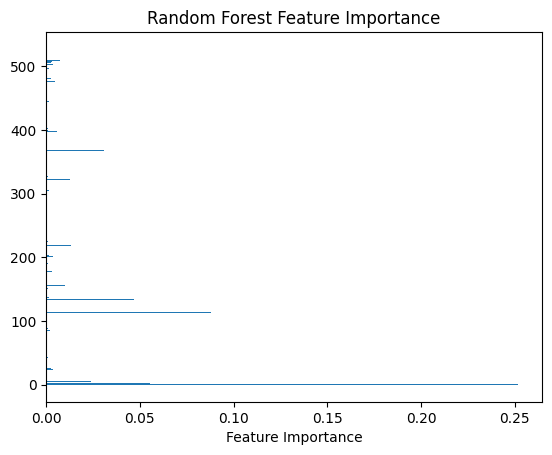

In [170]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(X_train.columns, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Text(0.5, 1.0, 'Residual Distribution')

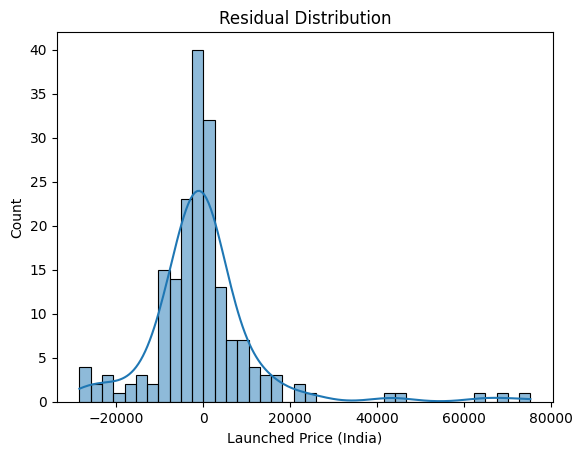

In [171]:
import seaborn as sns

residuals = y_test - model.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")

In [172]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {scores}")

Cross-Validation Scores: [0.90941459 0.87578178 0.72178068 0.92973152 0.87829419]


Training the model in the using a neural network.

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [143]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [144]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [145]:
# Early Stopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [146]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=10,callbacks=[early_stopping])

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4321750016.0000 - mean_squared_error: 4321750016.0000 - val_loss: 5103229952.0000 - val_mean_squared_error: 5103229440.0000
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3846527232.0000 - mean_squared_error: 3846527232.0000 - val_loss: 5103229952.0000 - val_mean_squared_error: 5103229440.0000
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3900701184.0000 - mean_squared_error: 3900701184.0000 - val_loss: 5103229952.0000 - val_mean_squared_error: 5103229440.0000
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4509007360.0000 - mean_squared_error: 4509007872.0000 - val_loss: 5103229952.0000 - val_mean_squared_error: 5103229440.0000
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4161147648.0000 - mean_squared_error: 4161147648.0000 - val_loss: 5103229952.0000 - val_mean_squared_error: 5103229440.0000
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4249014784.0000 - mean_squ